In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

print("Customers Dataset:")
print(customers.head(), "\n")

print("Products Dataset:")
print(products.head(), "\n")

print("Transactions Dataset:")
print(transactions.head(), "\n")

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166 

In [3]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [4]:
# Merge datasets for EDA
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [5]:
print("Missing Values:")
print(merged_data.isnull().sum(), "\n")

print("Summary Statistics:")
print(merged_data.describe(), "\n")

Missing Values:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64 

Summary Statistics:
          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000 



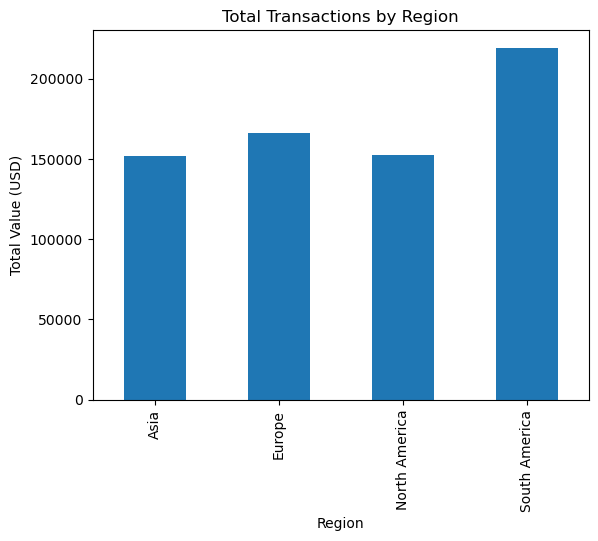

In [6]:
# 1. Total transactions by region
region_sales = merged_data.groupby('Region')['TotalValue'].sum()
region_sales.plot(kind='bar', title='Total Transactions by Region', ylabel='Total Value (USD)')
plt.show()

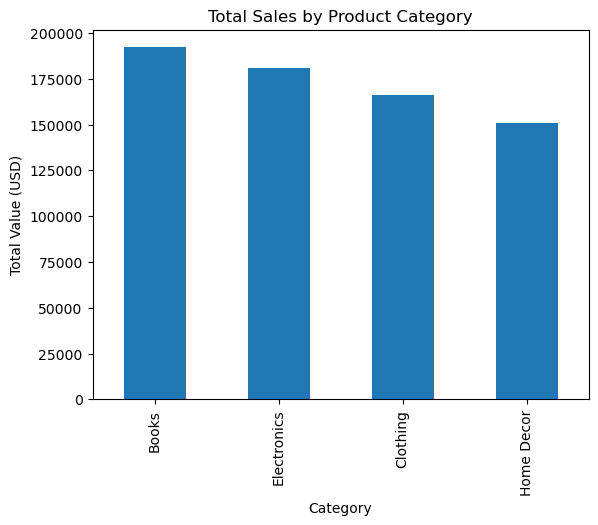

In [7]:
# 2. Product categories and their total sales
category_sales = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', title='Total Sales by Product Category', ylabel='Total Value (USD)')
plt.show()

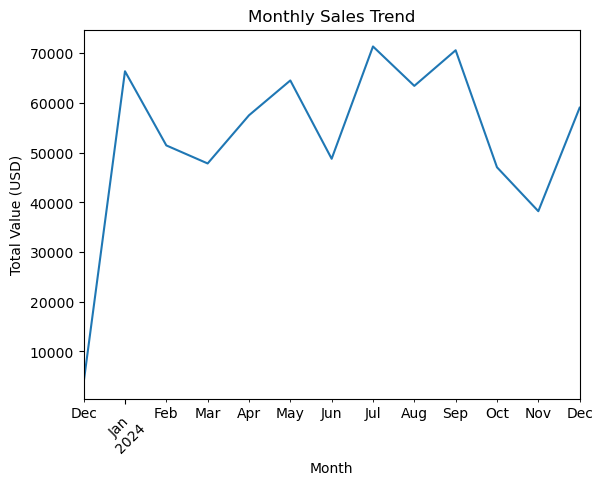

In [8]:
# 3. Monthly transactions over time
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(kind='line', title='Monthly Sales Trend', ylabel='Total Value (USD)', xlabel='Month')
plt.xticks(rotation=45)
plt.show()

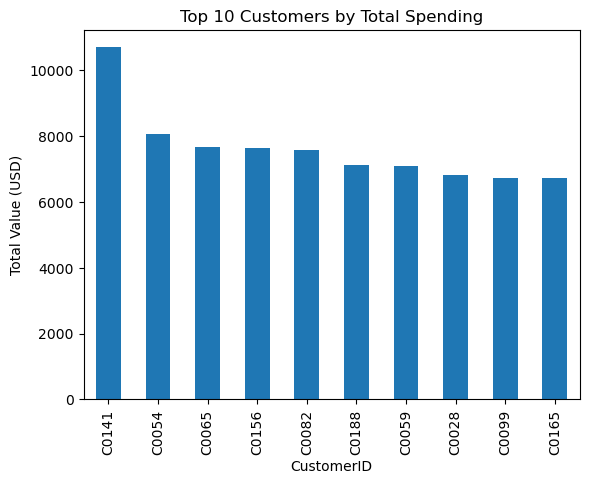

In [9]:
# 4. Top 10 customers by total spending
top_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', title='Top 10 Customers by Total Spending', ylabel='Total Value (USD)')
plt.show()

'Price' column not found. Deriving it using TotalValue / Quantity.


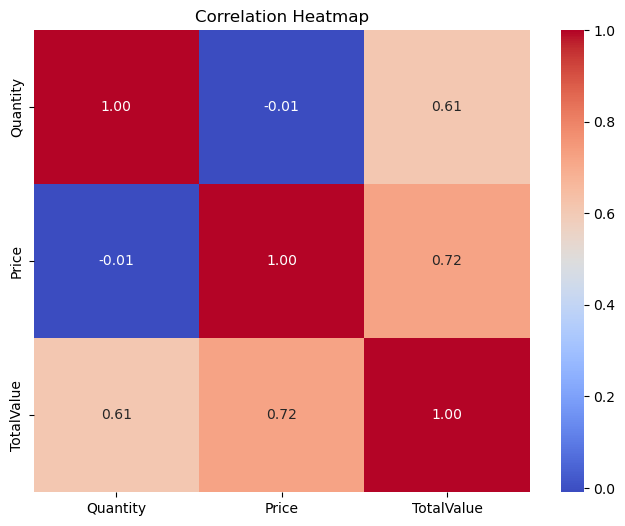

In [10]:
if 'Price' not in merged_data.columns:
    print("'Price' column not found. Deriving it using TotalValue / Quantity.")
    merged_data['Price'] = merged_data['TotalValue'] / merged_data['Quantity']
    
# Compute correlation matrix
corr = merged_data[['Quantity', 'Price', 'TotalValue']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()